In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
# import plot_is

In [3]:
import plot_is

In [4]:
cd ~/ramses/trunk/ramses/bin/

/global/u2/d/dorislee/ramses/trunk/ramses/bin


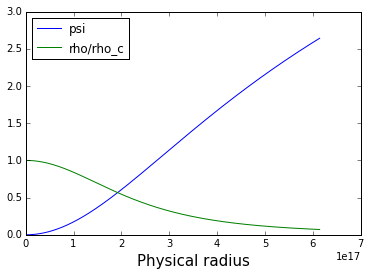

In [6]:
xi_max = 6.451
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
plt.plot(r,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [12]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho)


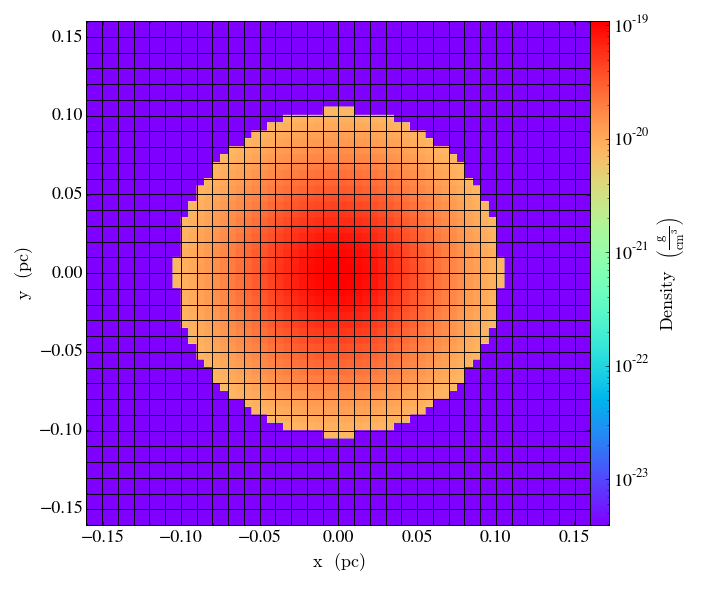


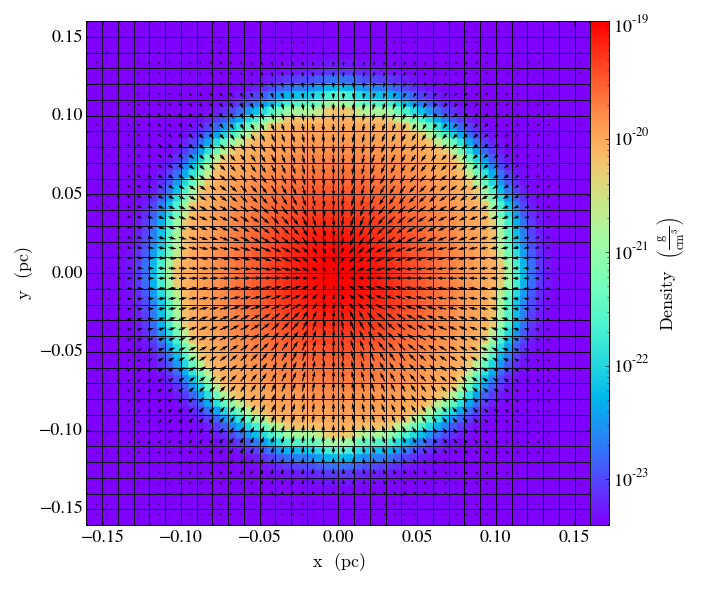


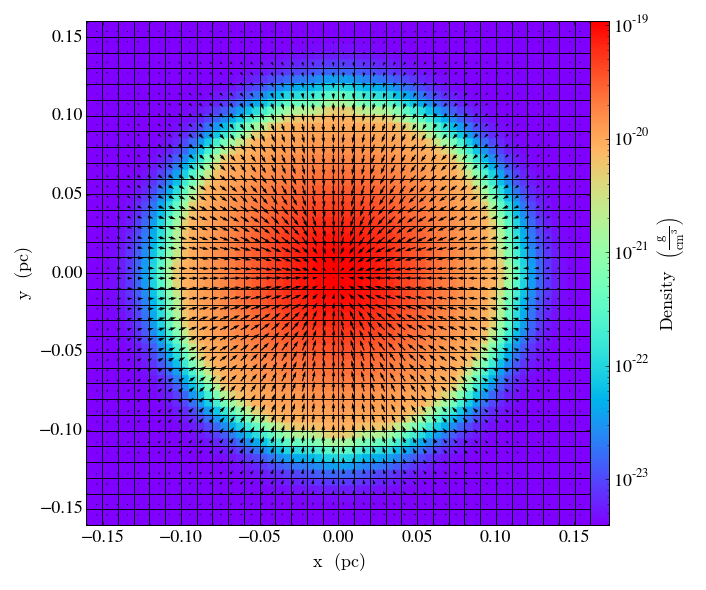


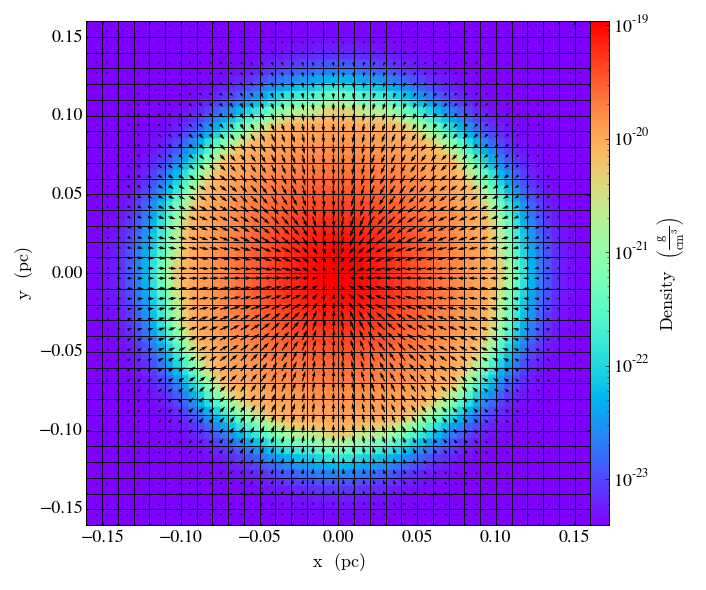


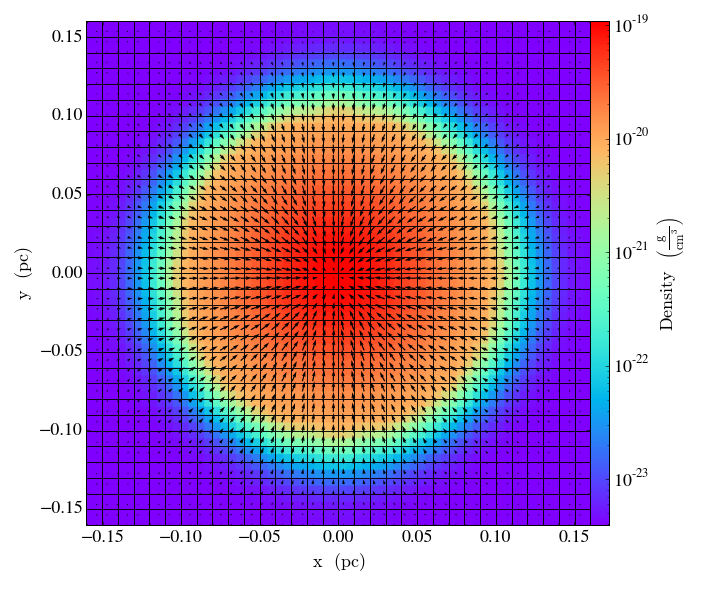


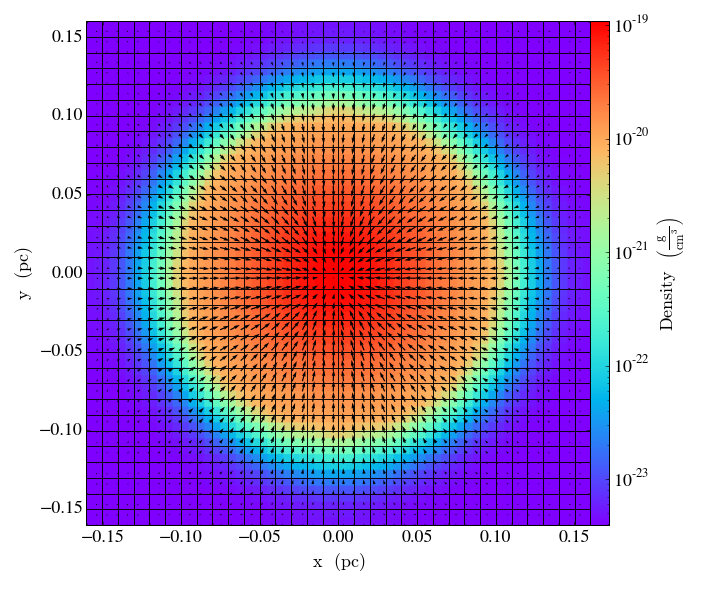


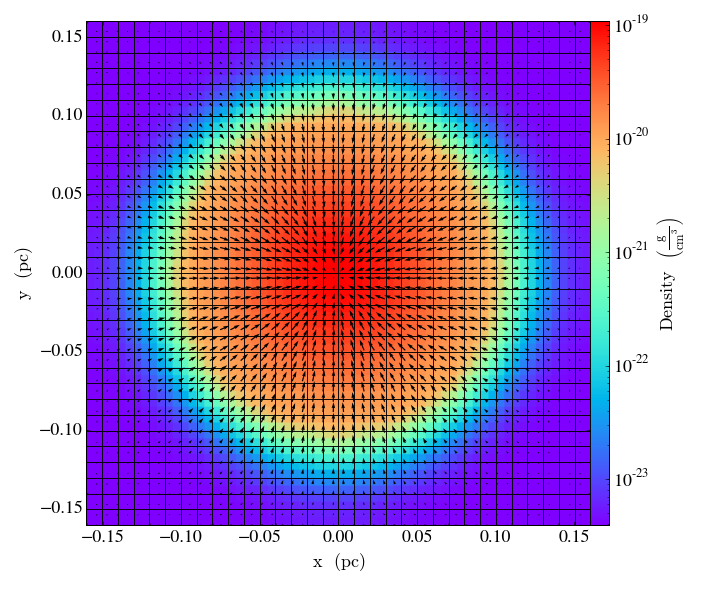


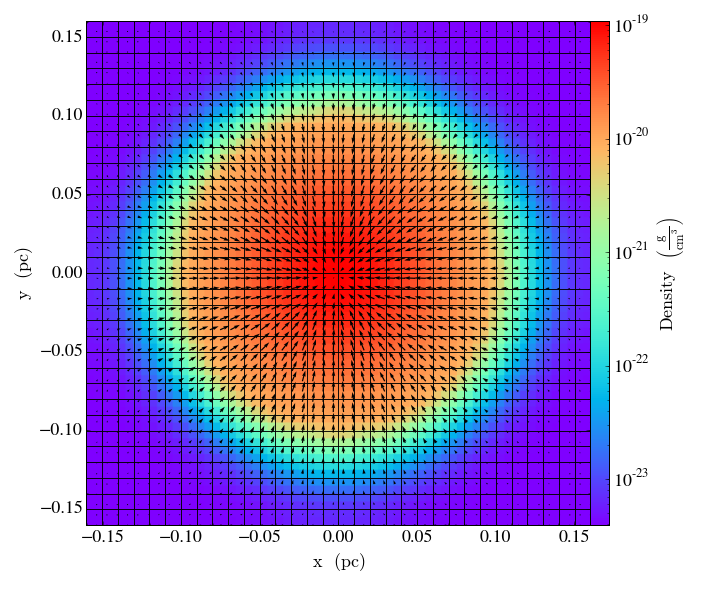


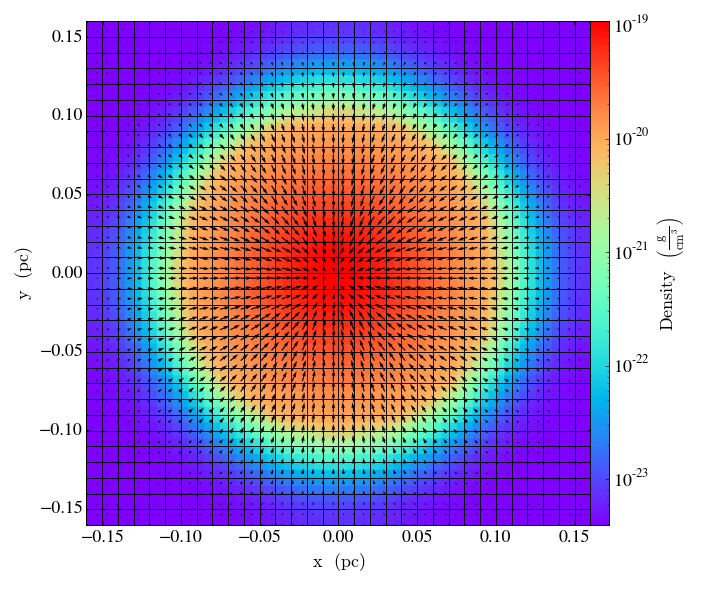


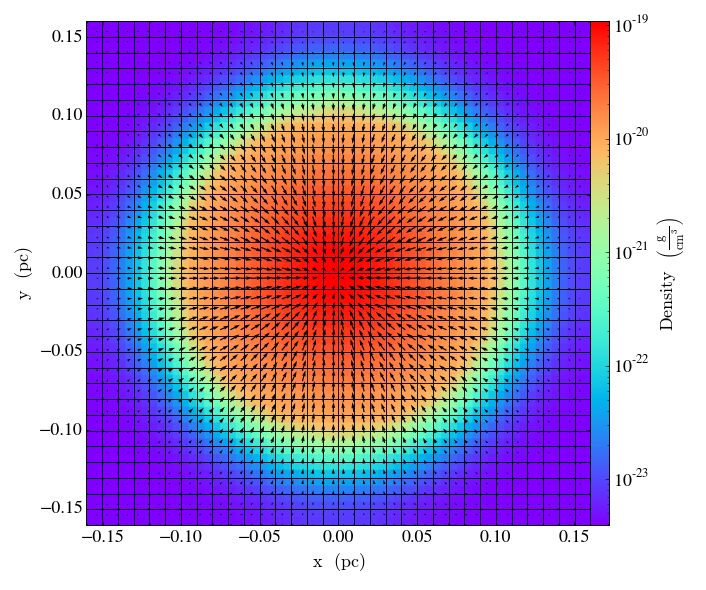


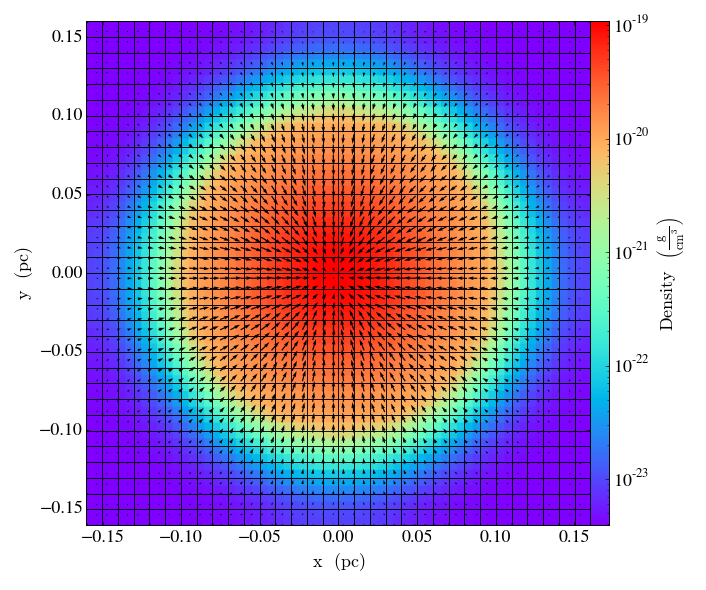


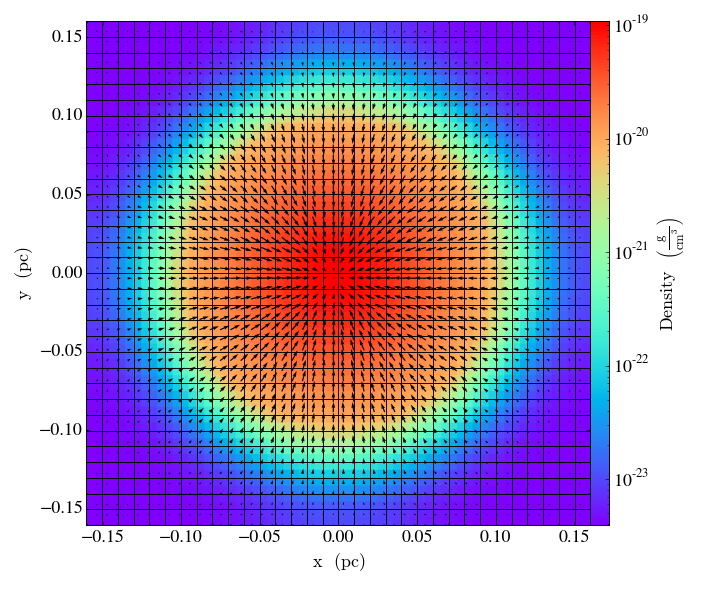


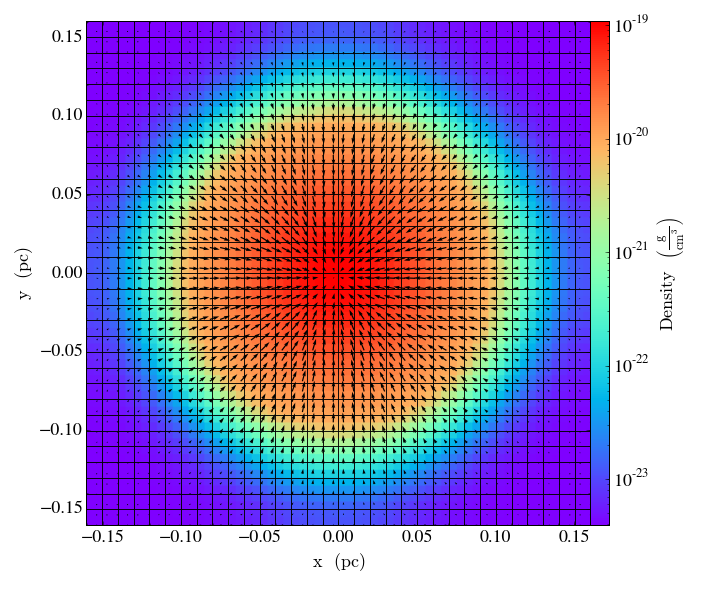


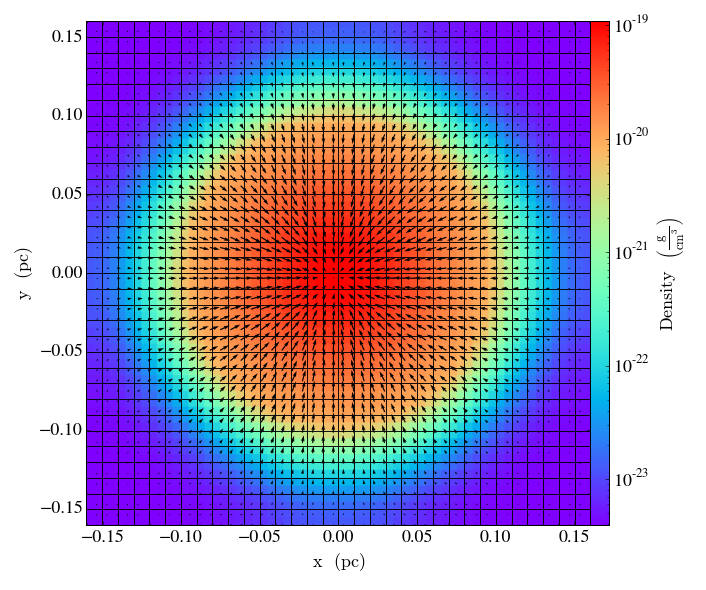


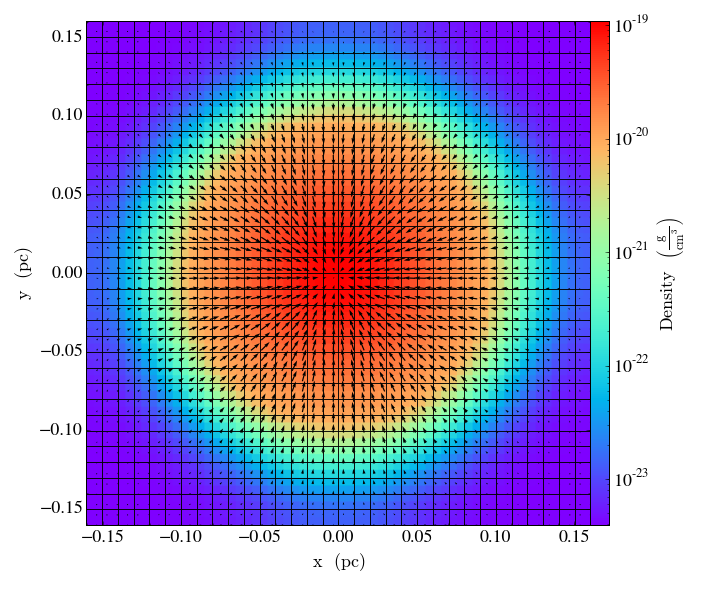

In [55]:
for i in np.arange(1,300):
    if i%20==0 or i==1:
        plot_is.plot_time_slice("density",i)

Stretching the colorbar on the result of numerical integration to the same as the simulation scale to check that this inital is actually done correctly

<matplotlib.colorbar.Colorbar instance at 0x7ffea732a680>

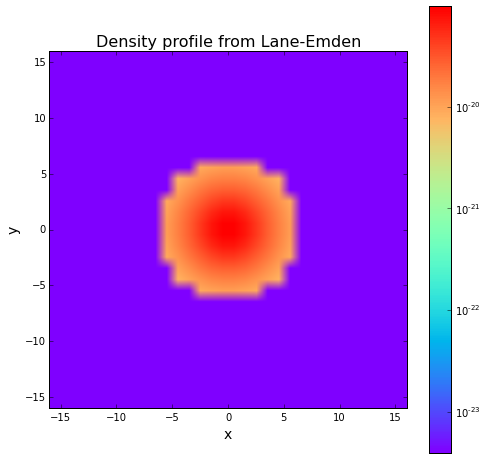

In [27]:
rho_c = 0.02806 #[1.1e-19 from Larson's paper in code units]
N = 32
xmax=32
ymax=32
zmax=32
scale_d = 3.9234e-18
img = np.zeros((xmax,ymax,zmax))
for x in np.linspace(-1.0*(img.shape[0]-1)/2.,(img.shape[0]-1)/2.,N):
    for y in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
        for z in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
            r = np.sqrt(x**2+y**2+z**2)
            #theta = np.arctan(y/x) 
            if (r<xi_max):
    #             rho_i=5
                dr = 0.01
                xi = int(r/dr)
                #print r,xi
                rho_i =rho[xi]*rho_c
                #print r, xi,rho_i
            else:
                rho_i = 1.0e-6
            img[x+xmax/2][y+ymax/2][z+zmax/2]=rho_i
plt.figure(figsize=(8,8))
from matplotlib.colors import LogNorm
#convert back to g/cm^3 for comparison with the code setup
im = plt.imshow(img[::,zmax/2]*scale_d,cmap="rainbow",norm=LogNorm())#,origin="lower")
im.set_extent([-xmax/2,xmax/2,-ymax/2,ymax/2])
plt.title("Density profile from Lane-Emden",fontsize=16)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.colorbar()

Make sure that if I turn off self gravity then the sphere should just stay there and not move


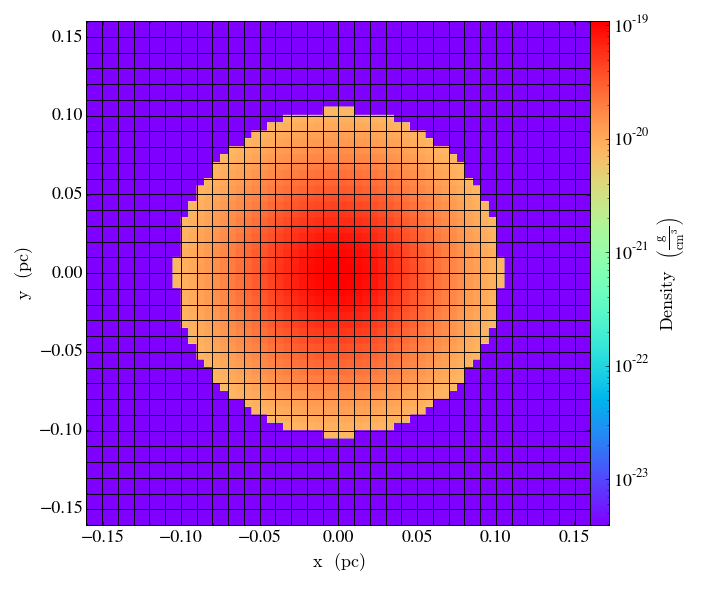


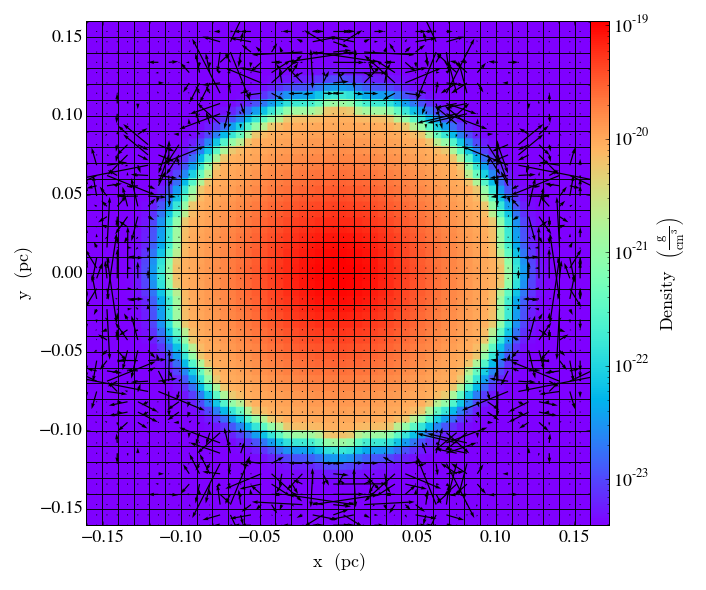


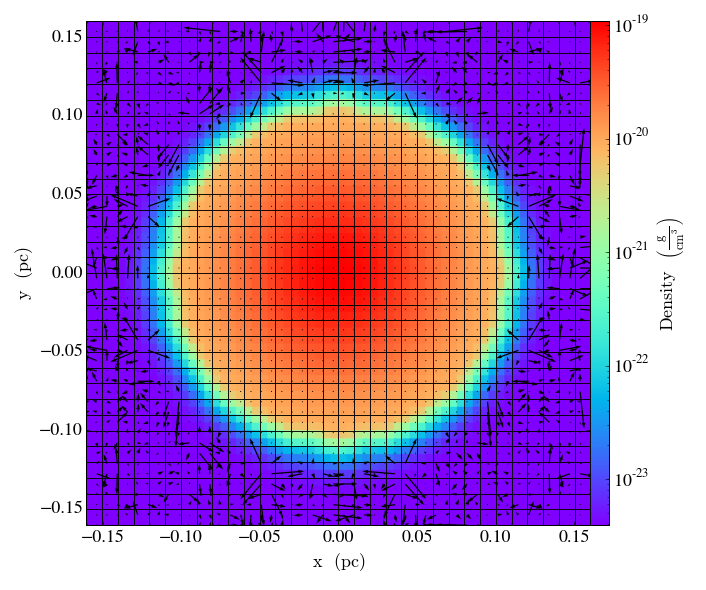


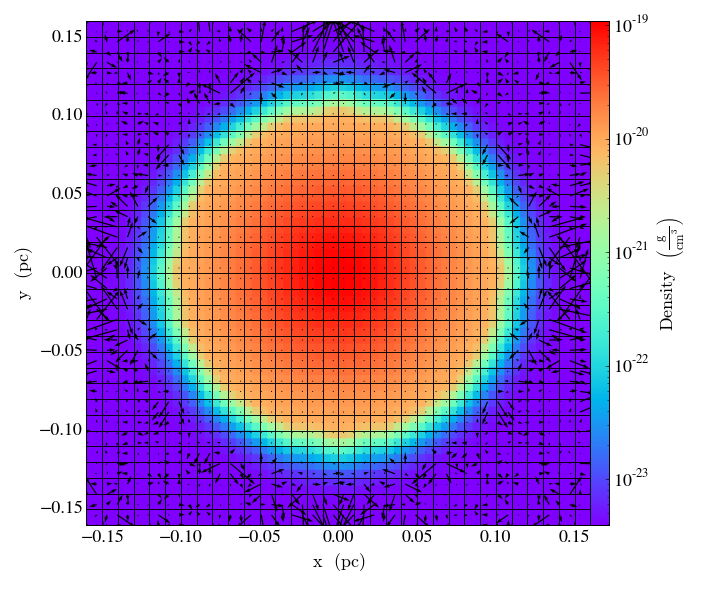


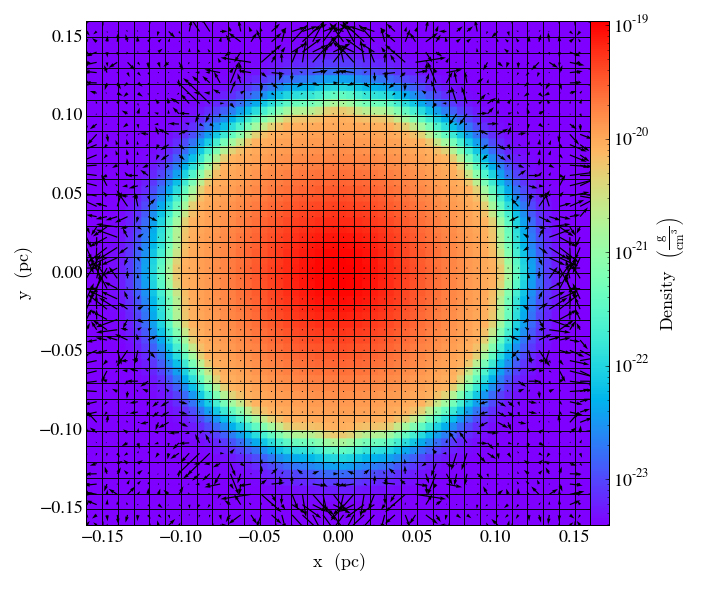


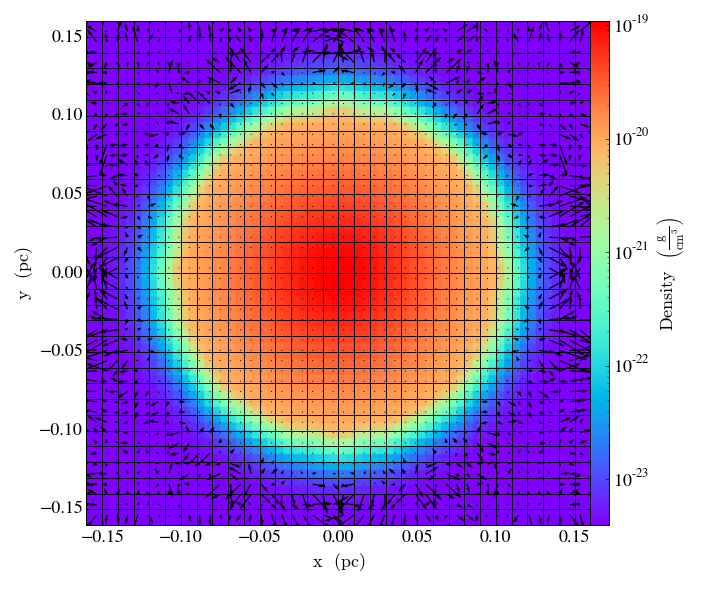


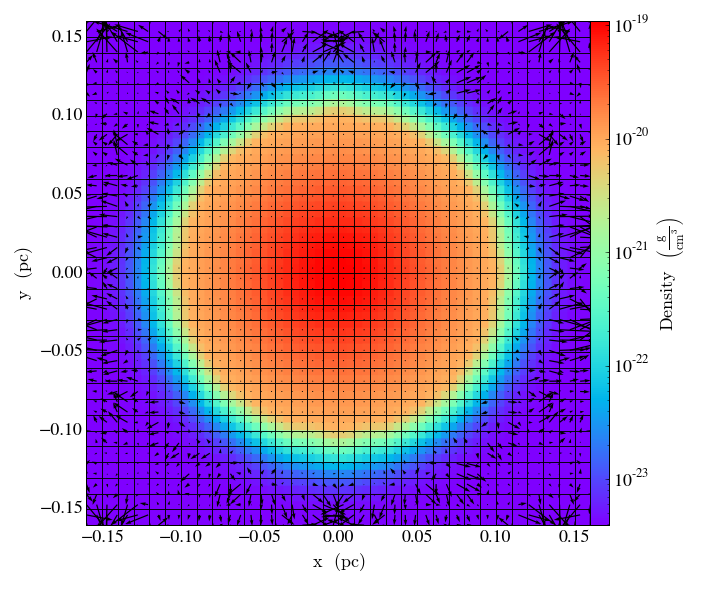


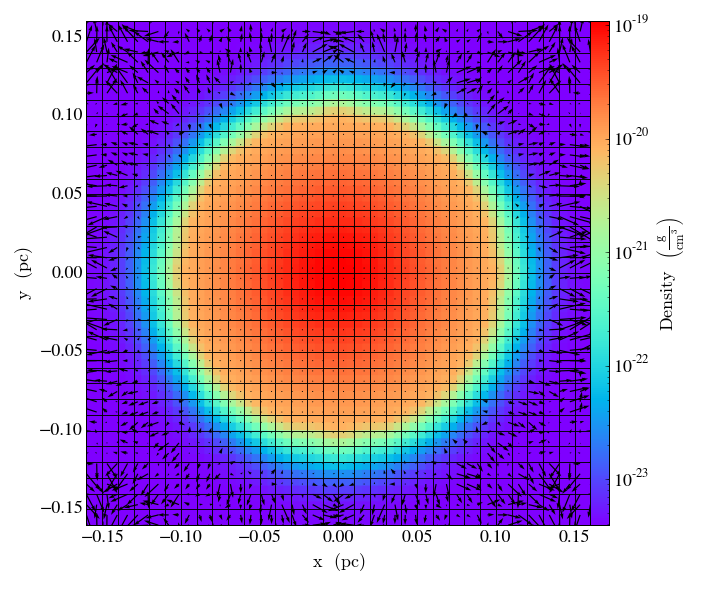


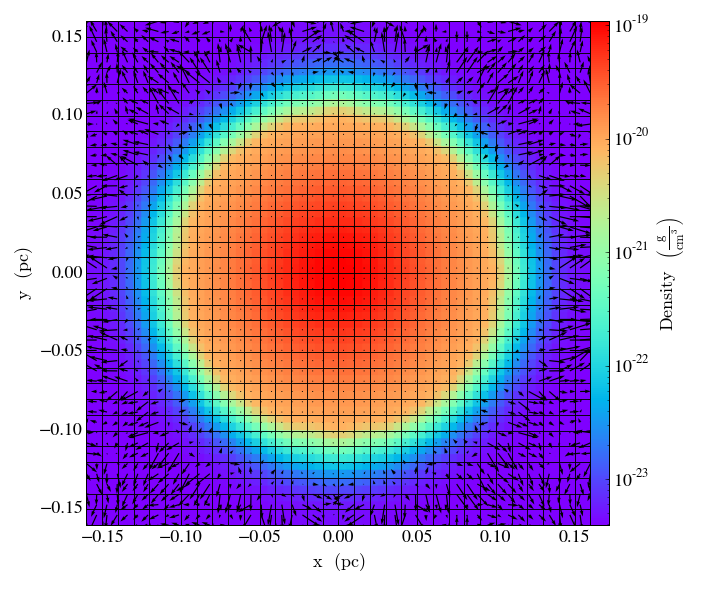

In [57]:
for i in np.arange(1,10):
    plot_is.plot_time_slice("density",i)

There are some random velocities in the outer low density gas that developed as the sphere evolves, to make them more negligible to the sphere. I lowered the outer density by another two orders of magnitude to 1e-8. 


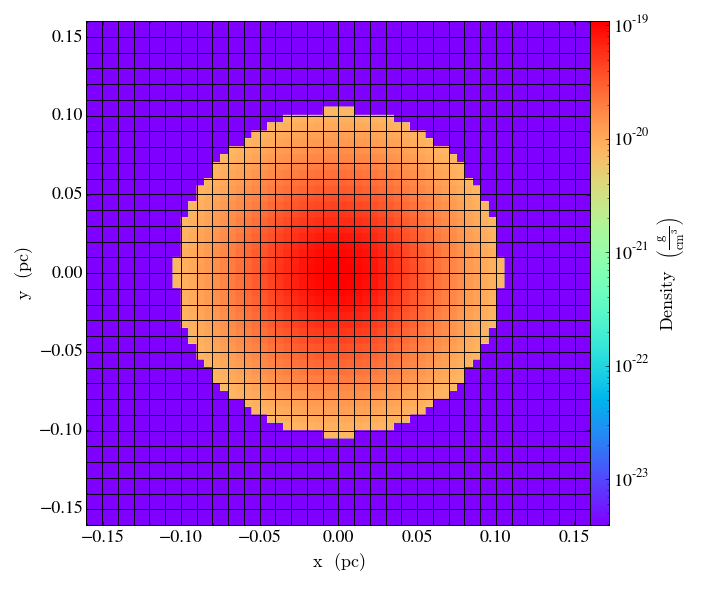


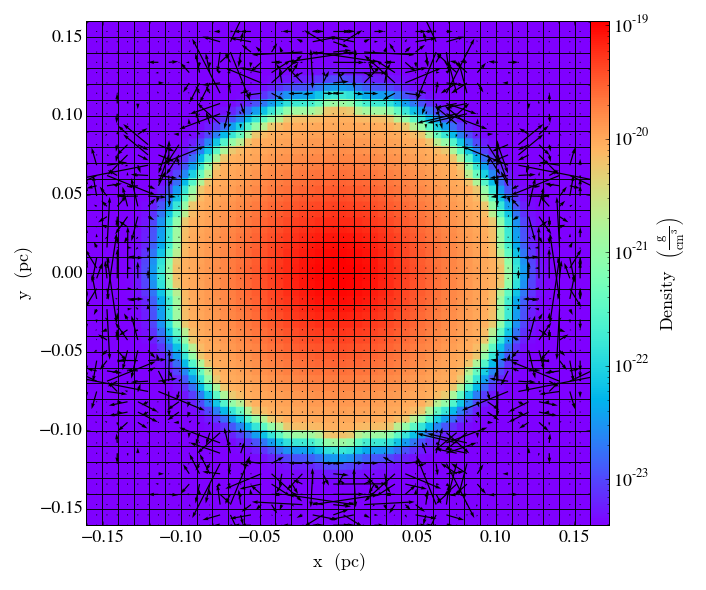


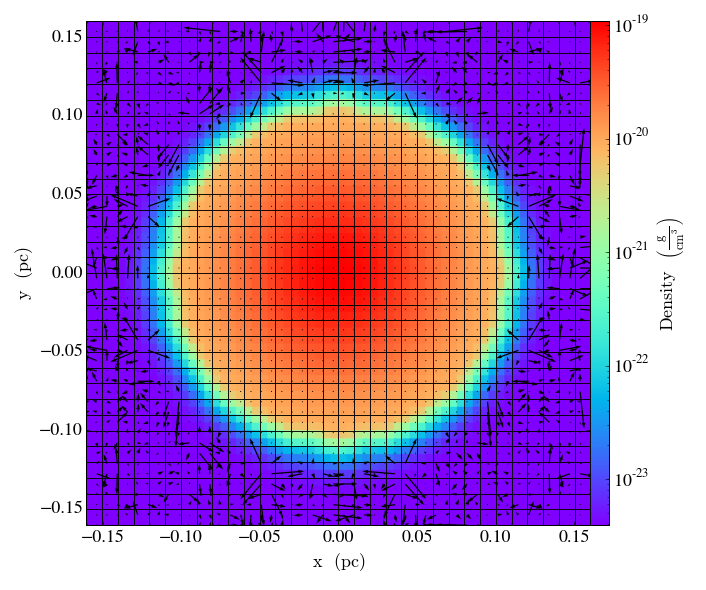


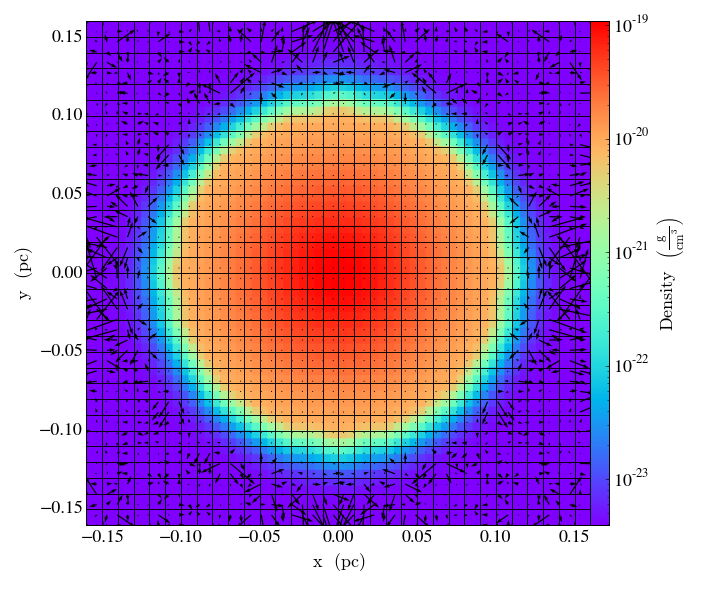


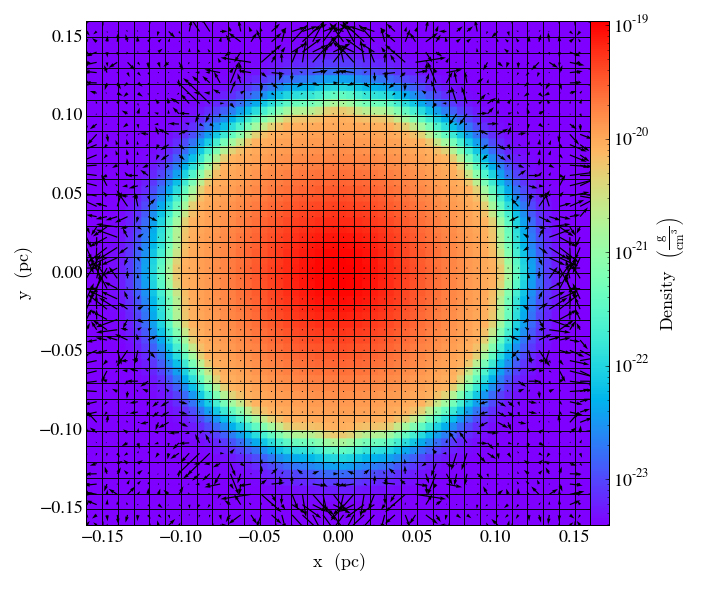


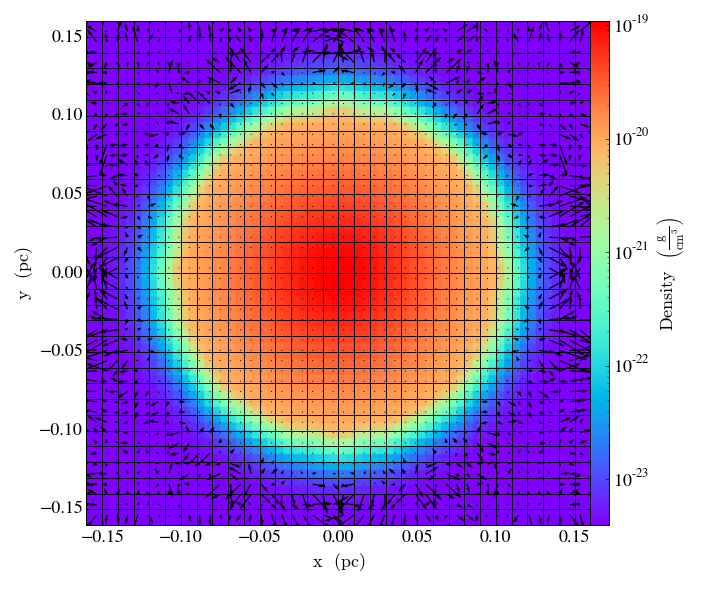


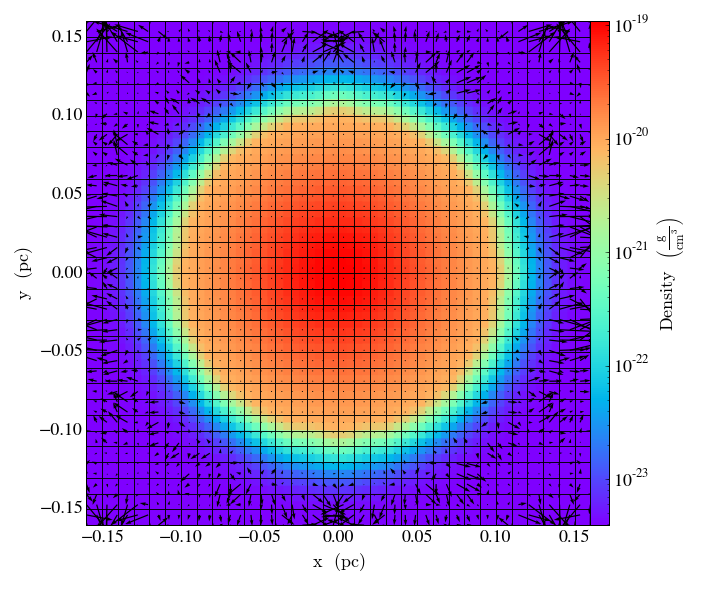


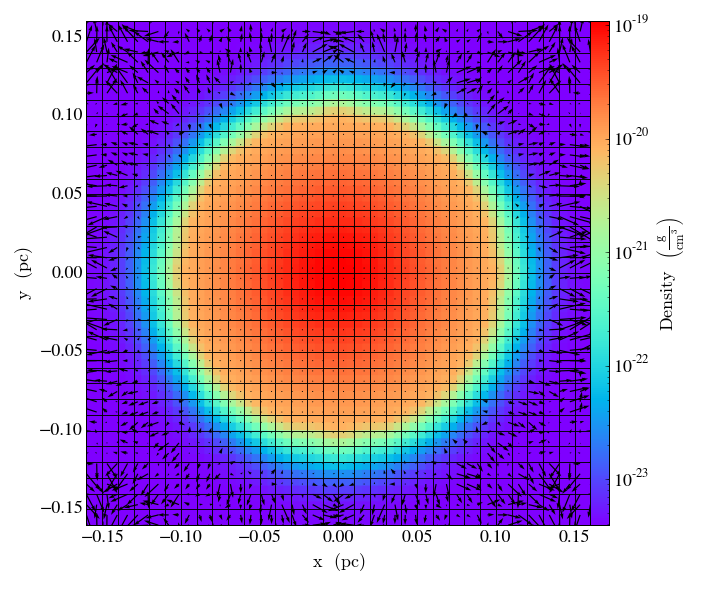


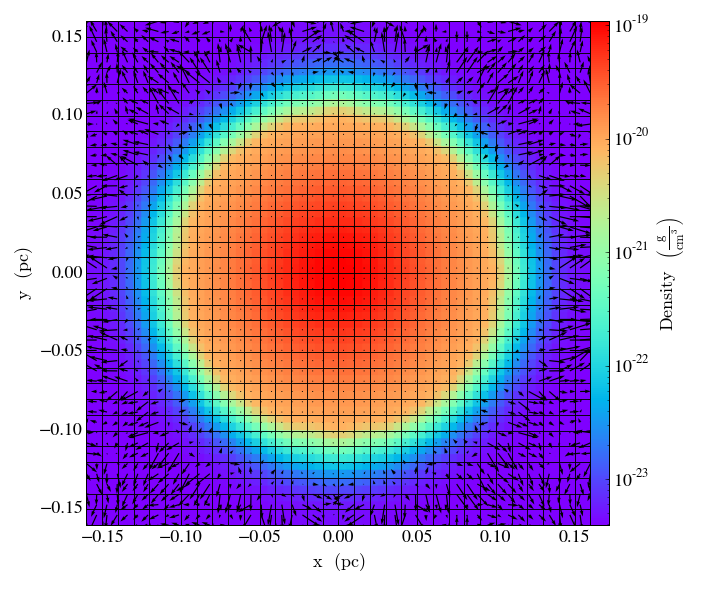


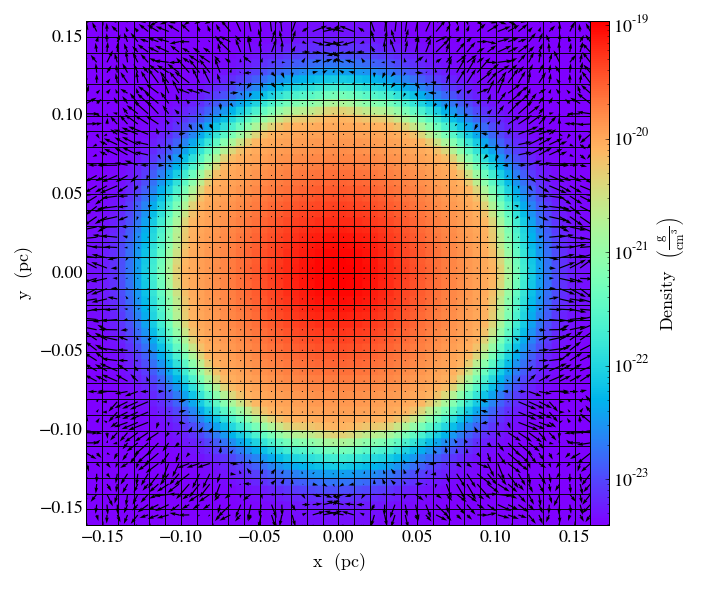


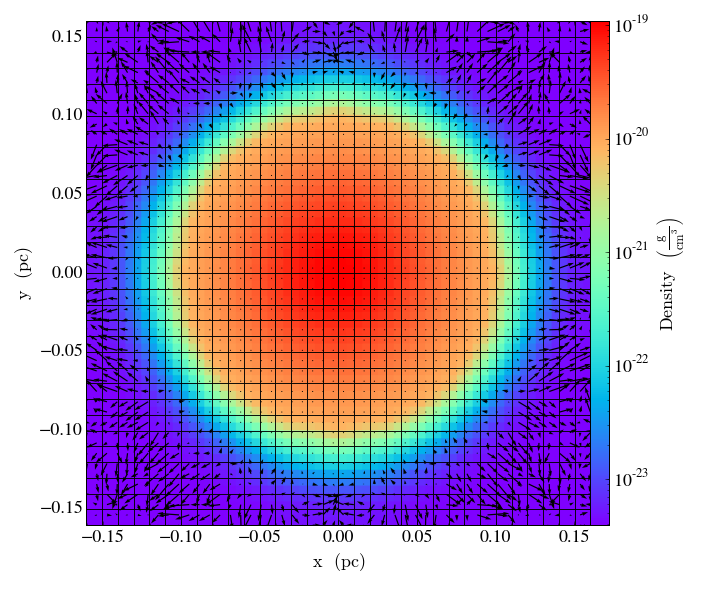


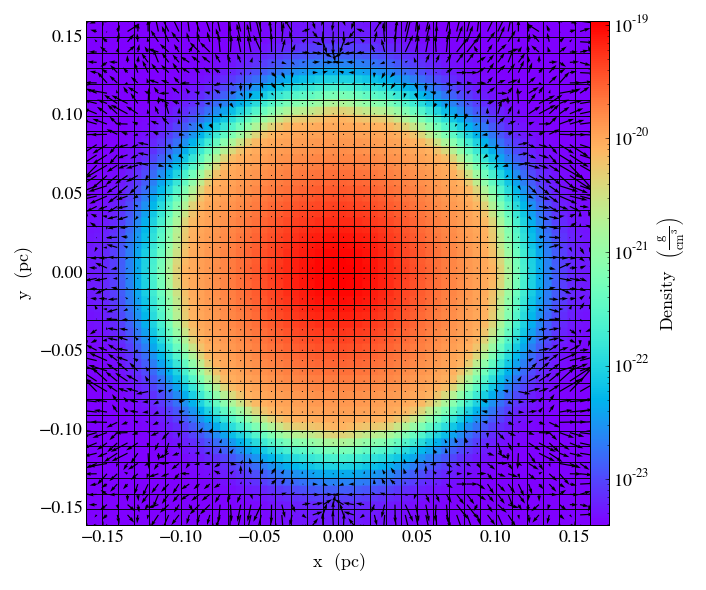

In [66]:
for i in np.arange(1,13):
    plot_is.plot_time_slice("density",i)

The low denisty boundary sort of wiggles a bit but I think the sphere stays there okay at least for $3\times10^{11}$ years

In [67]:
1954815568499*20*0.01

390963113699.8

Not sure why I can not run this on a serial queus , have to use the hopper queus with mppwidth =1 
Operating system error: Cannot allocate memory
Allocation would exceed memory limit

In [36]:
slc.annotate_title?

In [44]:
slc.annotate_text?

In [64]:
ds= yt.load("output_00001/info_00001.txt")
slc = yt.SlicePlot(ds, "z","density" ,window_size=7)
slc.set_font_size(20)
title=yt.visualization.plot_modifications.TitleCallback("title")
title(slc)
# slc.annotate_title("Test")
slc.annotate_text((0,1),"timestep #:")

AttributeError: 'AxisAlignedSlicePlot' object has no attribute '_axes'

In [49]:
ds= yt.load("output_{0}/info_{0}.txt".format(str(2).zfill(5)))
all_data_level_6 = ds.covering_grid(level=6, left_edge=[0,0.0,0.0],dims=[32,32,32])
all_data_level_6['density'].shape
all_data_level_6['density']

(32, 32, 32)